Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


Epoch 1/20
179/179 [==============================] - 454s 3s/step - loss: 1.2024 - accuracy: 0.4498 - val_loss: 1.1771 - val_accuracy: 0.3974
Epoch 2/20
179/179 [==============================] - 445s 2s/step - loss: 1.0557 - accuracy: 0.5385 - val_loss: 1.1214 - val_accuracy: 0.5683
Epoch 3/20
179/179 [==============================] - 443s 2s/step - loss: 1.0095 - accuracy: 0.5606 - val_loss: 1.0164 - val_accuracy: 0.6224
Epoch 4/20
179/179 [==============================] - 440s 2s/step - loss: 0.9784 - accuracy: 0.5814 - val_loss: 0.9825 - val_accuracy: 0.6506
Epoch 5/20
179/179 [==============================] - 446s 2s/step - loss: 0.9546 - accuracy: 0.5966 - val_loss: 1.0102 - val_accuracy: 0.6247
Epoch 6/20
179/179 [==============================] - 445s 2s/step - loss: 0.9348 - accuracy: 0.6077 - val_loss: 0.9760 - val_accuracy: 0.6133
Epoch 7/20
179/179 [==============================] - 445s 2s/step - loss: 0.9325 - accuracy: 0.6014 - val_loss: 0.9694 - val_accuracy: 0.6148

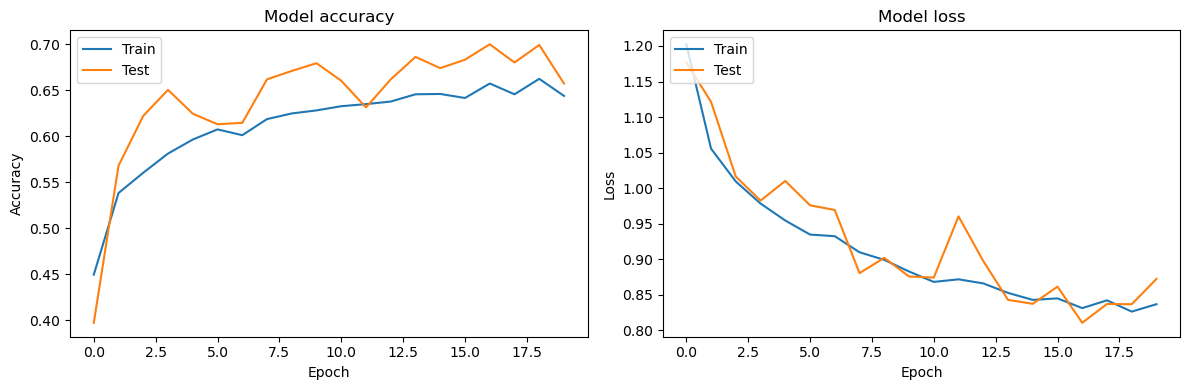

41/41 [==============================] - 38s 914ms/step - loss: 0.8108 - accuracy: 0.7002
Test Accuracy: 70.02%
41/41 [==============================] - 37s 891ms/step

Classification Report:
               precision    recall  f1-score   support

      glioma       0.24      0.21      0.22       300
  meningioma       0.21      0.15      0.17       306
     notumor       0.30      0.34      0.32       405
   pituitary       0.20      0.25      0.22       300

    accuracy                           0.24      1311
   macro avg       0.24      0.24      0.23      1311
weighted avg       0.24      0.24      0.24      1311


Confusion Matrix:
 [[ 64  57  95  84]
 [ 64  45 103  94]
 [ 87  63 137 118]
 [ 57  51 117  75]]


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Prepare Data
# No specific code needed for this step if your data is already organized into folders.

# Step 2: Load Data and Prepare Training and Testing Data
train_dir = 'Training'
test_dir = 'brain_'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'  # assuming multiple classes (change accordingly)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Step 3: Build the Model Architecture (ResNet50)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # Assuming 4 classes (adjust based on your data)

# Step 4: Compilation of the Model and Pre-training
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Model Training
epochs = 20
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    callbacks=[early_stopping]
)

# Step 6: Model Visualizations (Graphs to see model performance)
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# Step 7: Evaluate the Model on the Test Set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Step 8: Generate Predictions and Display Metrics
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)

# Display classification report and confusion matrix
class_labels = list(train_generator.class_indices.keys())
print('\nClassification Report:\n', classification_report(test_generator.classes, y_pred, target_names=class_labels))
print('\nConfusion Matrix:\n', confusion_matrix(test_generator.classes, y_pred, labels=np.arange(len(class_labels))))
